In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
df = pd.read_csv("book.csv")

In [3]:
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [5]:
df.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

# Apriori Algorithm

In [6]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True,verbose=1)
frequent_itemsets

Processing 44 combinations | Sampling itemset size 4


E:\Anaconda\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [7]:
frequent_itemsets.sort_values("support", ascending = False).head()

,support,itemsets
2,0.431,(CookBks)
0,0.423,(ChildBks)
3,0.282,(DoItYBks)
6,0.276,(GeogBks)
10,0.256,"(ChildBks, CookBks)"


In [21]:
rules_ap = association_rules(frequent_itemsets, metric= "confidence", min_threshold=0.4)
print(rules_ap.head())

  antecedents consequents  antecedent support  consequent support  support  \
0  (YouthBks)  (ChildBks)              0.2475               0.423    0.165   
1  (ChildBks)   (CookBks)              0.4230               0.431    0.256   
2   (CookBks)  (ChildBks)              0.4310               0.423    0.256   
3  (ChildBks)  (DoItYBks)              0.4230               0.282    0.184   
4  (DoItYBks)  (ChildBks)              0.2820               0.423    0.184   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.666667  1.576044  0.060308    1.731000       0.485714  
1    0.605201  1.404179  0.073687    1.441240       0.498856  
2    0.593968  1.404179  0.073687    1.421069       0.505870  
3    0.434988  1.542511  0.064714    1.270770       0.609543  
4    0.652482  1.542511  0.064714    1.660347       0.489842  


In [22]:
rules_ap['lhs_items'] = rules_ap['antecedents'].apply(lambda x:len(x) )
rules_ap[rules_ap['lhs_items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs_items
57,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008,2
59,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,0.682834,2
68,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866,2
66,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298,2
40,"(ChildBks, CookBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277,0.741584,2


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'ArtBks'),
  Text(1.5, 0, 'ChildBks'),
  Text(2.5, 0, 'CookBks'),
  Text(3.5, 0, 'DoItYBks'),
  Text(4.5, 0, 'GeogBks'),
  Text(5.5, 0, 'RefBks'),
  Text(6.5, 0, 'YouthBks')])

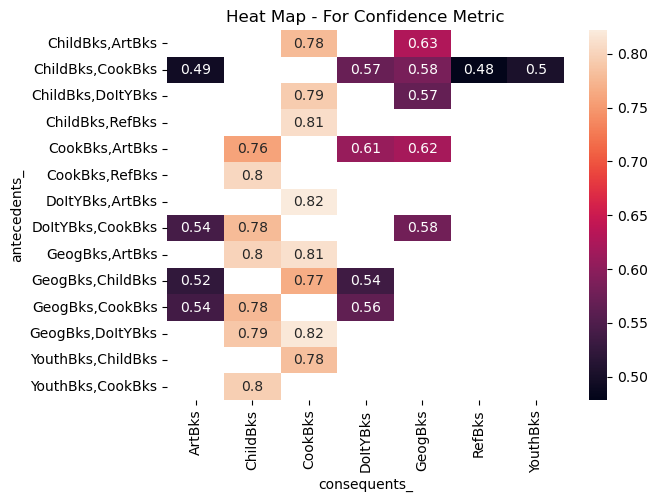

In [23]:
rules_ap['antecedents_'] = rules_ap['antecedents'].apply(lambda a: ','.join(list(a)))
rules_ap['consequents_'] = rules_ap['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = rules_ap[rules_ap['lhs_items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')
# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [24]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355


In [25]:
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
78,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
79,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
87,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
...,...,...,...,...,...,...,...,...,...,...
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870


In [26]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
78,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
79,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
87,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
82,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,0.682834
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
99,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961
94,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298


In [27]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355


array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>]], dtype=object)

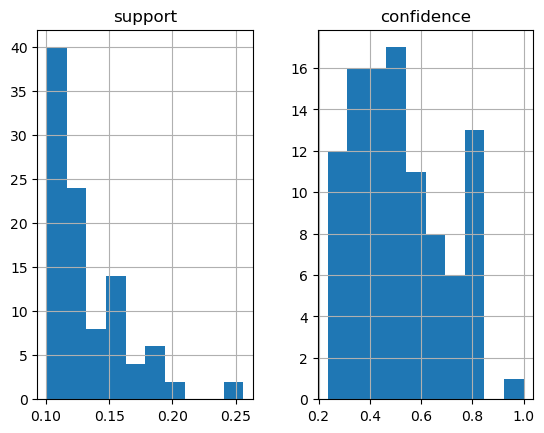

In [28]:
rules[['support','confidence']].hist()

array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>],
       [<AxesSubplot:title={'center':'lift'}>, <AxesSubplot:>]],
      dtype=object)

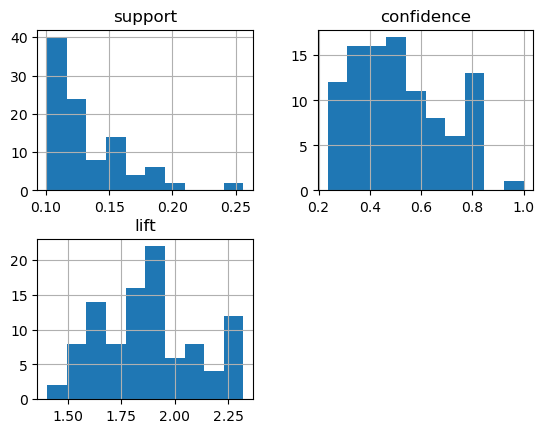

In [29]:
rules[['support','confidence','lift']].hist()

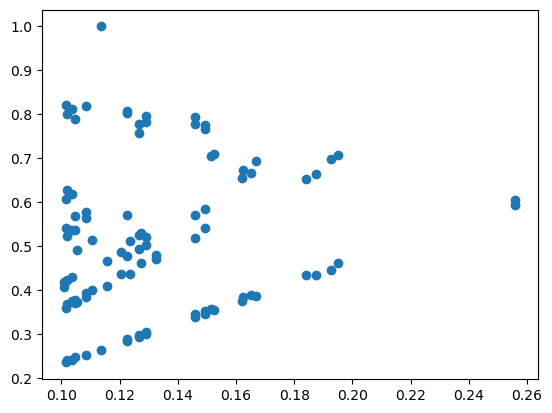

In [30]:
plt.scatter(rules['support'], rules['confidence'])
plt.show()

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


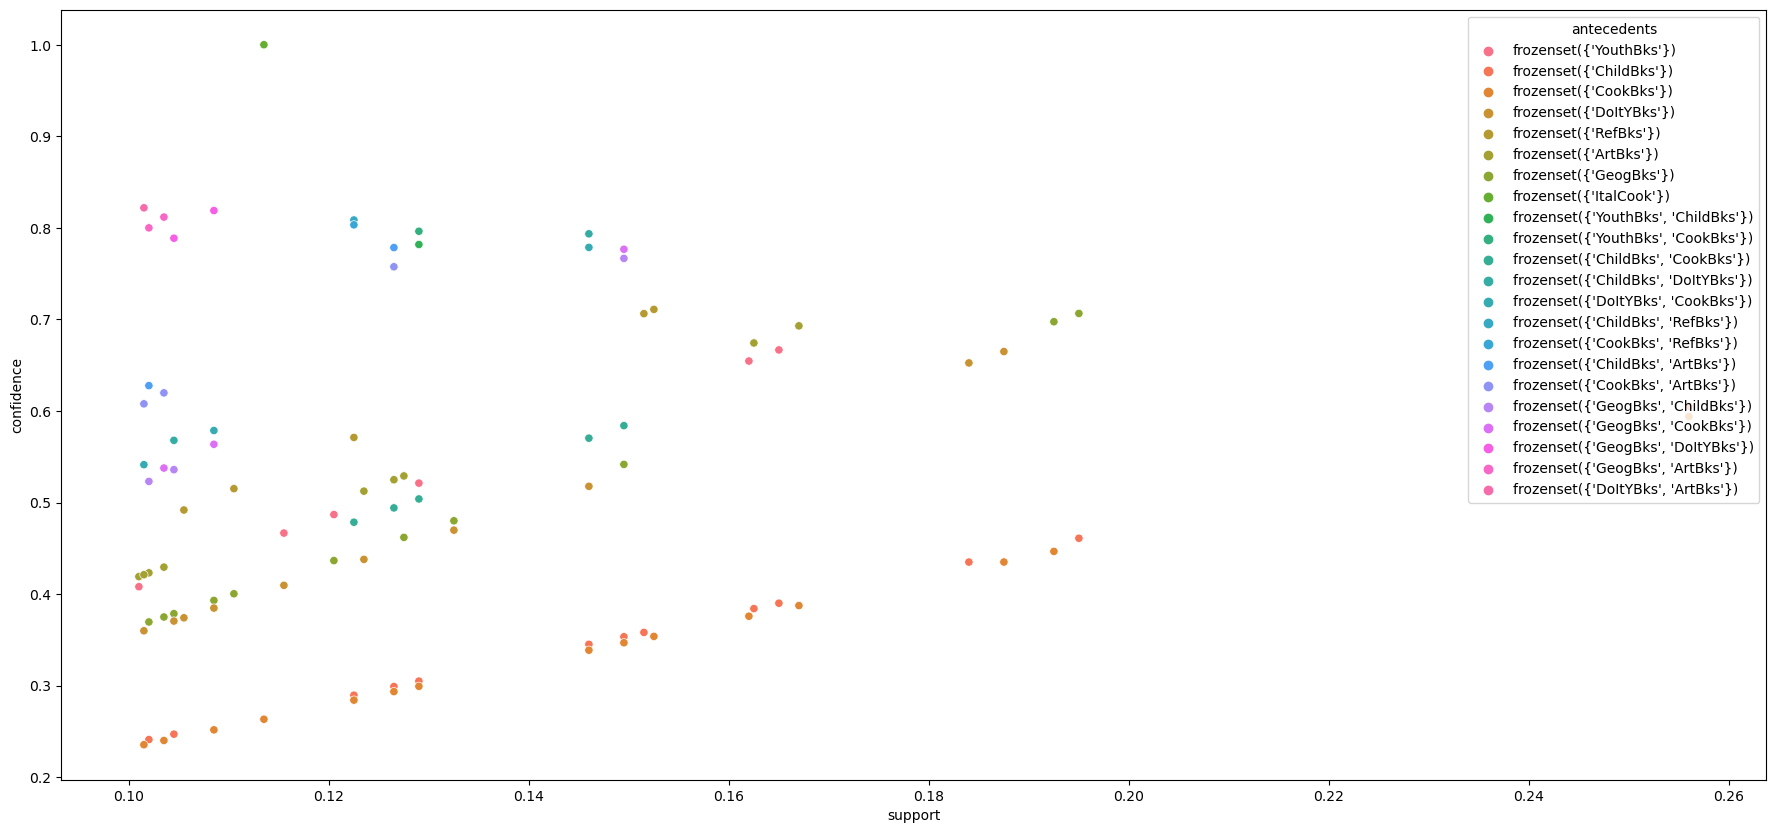

In [31]:
plt.figure(figsize=(22,10))
sns.scatterplot('support', 'confidence', data=rules, hue='antecedents')
plt.show()